Metropolis-Hastings算法（后面简称MH算法）是MCMC的代表算法，下面先对MH做一个简单的推导，然后写出MH算法流程，最后再对细节做讨论分析，本部分内容主要参考了[刘建平：《MCMC(三)MCMC采样和M-H采样》](https://www.cnblogs.com/pinard/p/6638955.html)

### 一.算法推导

根据上一节的讨论，我们知道只要找到一个概率转移函数$p(x\rightarrow x')$，使得它与我们的目标分布$p(x)$满足如下的一个细致平衡方程：   

$$
p(x)p(x\rightarrow x')=p(x')p(x'\rightarrow x)
$$  

那么，就能保证对马尔科夫链$p(x\rightarrow x')$随机游走采样的经验分布近似于我们的目标分布$p(x)$，但是这样的$p(x\rightarrow x')$没有那么容易构造，这里借鉴接收-拒绝采样的思路，首先我们造一个容易采样的分布$q(x\rightarrow x')$，称为建议分布，利用它来采样，显然这时它们很难满足细致平衡方程： 

$$
p(x)q(x\rightarrow x')\neq p(x')q(x'\rightarrow x)
$$

然后，我们再造一个接收概率$\alpha(x\rightarrow x')$来调节：   

$$
p(x)q(x\rightarrow x')\alpha(x\rightarrow x')= p(x')q(x'\rightarrow x)\alpha(x'\rightarrow x)
$$  

很Nice的思路！将一个难的问题拆解为两个相对容易解决的问题，那么$\alpha(x\rightarrow x')$如果构造勒，这就很简单了，可以令：   

$$
\alpha(x\rightarrow x')=p(x')q(x'\rightarrow x)\\
\alpha(x'\rightarrow x)=p(x)q(x\rightarrow x')
$$  

简直是完美，$\alpha(x\rightarrow x')$也不用费解心机去造了，我们只要找一个好抽样的$q(x\rightarrow x')$就可以啦，所以捋一下现在的采样流程：

####  采样流程

输入：抽样的目标分布密度函数$p(x)$，正整数$m,n,m<n$  
输出：$p(x)$的随机样本$x_{m+1},x_{m+2},...,x_n$
>（1）任意选择一个初始值$x_0$；    
>（2）对$i=1,2,...,n$循环执行：   
>>（a）设状态$x_{i-1}=x$，按照建议分布$q(x\rightarrow x')$随机抽取一个候选状态$x'$；    
>>（b）计算接收概率：   
$$
\alpha(x\rightarrow x')=p(x')q(x'\rightarrow x)
$$    
>>（c）从区间$(0,1)$中按均匀分布随机抽取一个数$u$，如果$u\leq \alpha(x\rightarrow x')$，则取状态$x_i=x'$，否则取$x_i=x$   
>（3）得到样本集合$\{x_{m+1},x_{m+2},...,x_n\}$

但是呢，这里有个问题，那就是$\alpha(x\rightarrow x')=p(x')q(x'\rightarrow x)$可能会低哟，这样会导致很多采样样本被拒绝，效率低下，那么有没有可能找到一个方法提高$\alpha(x\rightarrow x')$呢？有的，那就是MH算法....

### 二.MH算法
MH算法的思想很朴实，那就是等比例的提升$\alpha(x\rightarrow x')$与$\alpha(x'\rightarrow x)$，但又不能超过1，这样既能保证细致平衡方程成立，又能提高接受率，举一例子来直观理解一下，比如我们在$(0,1)$上做均匀采样，接受率为0.1和接受率为1其实效果是一样的，采样结果最终都符合$(0,1)$上的均匀分布，但前者会拒绝掉90%的样本，那MH是怎么调整的勒，很简单，它分两种情况：   

>（1）若$p(x)q(x\rightarrow x')>p(x')q(x'\rightarrow x)$，那么，对等式两边同除以$p(x)q(x\rightarrow x')$：

$$
1\cdot\alpha(x\rightarrow x')=\frac{p(x')q(x'\rightarrow x)}{p(x)q(x\rightarrow x')}\alpha(x'\rightarrow x)
$$   

>所以，我们可以令：   

$$
\alpha(x\rightarrow x')=\frac{p(x')q(x'\rightarrow x)}{p(x)q(x\rightarrow x')}\\
\alpha(x'\rightarrow x)=1
$$

>（2）反过来，若$p(x')q(x'\rightarrow x)>p(x)q(x\rightarrow x')$，那么，对等式两边同除以$p(x')q(x'\rightarrow x)$：

$$
\frac{p(x)q(x\rightarrow x')}{p(x')q(x'\rightarrow x)}\cdot\alpha(x\rightarrow x')=1\cdot\alpha(x'\rightarrow x)
$$   

>所以，我们可以令：   

$$
\alpha(x\rightarrow x')=1\\
\alpha(x'\rightarrow x)=\frac{p(x)q(x\rightarrow x')}{p(x')q(x'\rightarrow x)}
$$

而对于这两种情况，我们其实是可以综合一下，那就是：    

$$
\alpha(x\rightarrow x')=min\{1,\frac{p(x')q(x'\rightarrow x)}{p(x)q(x\rightarrow x')}\}\\
\alpha(x'\rightarrow x)=min\{1,\frac{p(x)q(x\rightarrow x')}{p(x')q(x'\rightarrow x)}\}
$$   

到这里，$\alpha(x\rightarrow x')$的接收率一定比之前高（$p(x)q(x\rightarrow x')$大部分情况是远小于1的正数），即：    

$$
min\{1,\frac{p(x')q(x'\rightarrow x)}{p(x)q(x\rightarrow x')}\}>p(x')q(x'\rightarrow x)
$$

所以,MH的算法流程就可以梳理出来了

#### MH采样流程

输入：抽样的目标分布密度函数$p(x)$  
输出：$p(x)$的随机样本$x_{m+1},x_{m+2},...,x_n$
>（1）任意选择一个初始值$x_0$；    

>（2）对$i=1,2,...,n$循环执行：   

>>（a）设状态$x_{i-1}=x$，按照建议分布$q(x\rightarrow x')$随机抽取一个候选状态$x'$；    

>>（b）计算接收概率：   

$$
\alpha(x\rightarrow x')=min\{1,\frac{p(x')q(x'\rightarrow x)}{p(x)q(x\rightarrow x')}\}
$$    

>>（c）从区间$(0,1)$中按均匀分布随机抽取一个数$u$，如果$u\leq \alpha(x\rightarrow x')$，则取状态$x_i=x'$，否则取$x_i=x$   

>（3）得到样本集合$\{x_{m+1},x_{m+2},...,x_n\}$

### 三.细致平衡方程校验

下面我们还是对MH算法做个检验，看它是否满足细致平衡方程（虽然它就是从该方程推导来的...），此时的转移概率为建议分布和接收概率之积：    

$$
p(x\rightarrow x')=q(x\rightarrow x')\alpha(x \rightarrow x')
$$   

那么，我们需要检验的就是下面的等式是否成立：       

$$
p(x)p(x\rightarrow x')=p(x')p(x'\rightarrow x)
$$   

证明一下：    

$$
p(x)p(x\rightarrow x')=p(x)q(x\rightarrow x')min\{1,\frac{p(x')q(x'\rightarrow x)}{p(x)q(x\rightarrow x')}\}\\
=min\{p(x)q(x\rightarrow x'),p(x')p(x'\rightarrow x)\}\\
=p(x')q(x'\rightarrow x)min\{1,\frac{p(x)q(x\rightarrow x')}{p(x')q(x'\rightarrow x)}\}\\
=p(x')q(x'\rightarrow x)
$$  

好勒，最关键的一步得到了证明，接下来就到了放心的造$q(x\rightarrow x')$的时候了

### 四.$q(x\rightarrow x')如何选择$   

$q(x\rightarrow x')$比较省事儿的一种方法就是选择对称的建议分布，即：   

$$
q(x\rightarrow x')=q(x'\rightarrow x)
$$   

这时接收概率的计算也变得简单了：    

$$
\alpha(x\rightarrow x')=min\{1,\frac{p(x')}{p(x)}\}
$$    


$q(x\rightarrow x')$通常可以选择：   

（1）以$x$为均值，其协方差为常数矩阵的高斯分布；    

（2）或者选择：   

$$
q(x\rightarrow x')\propto exp(-\frac{(x-x')^2}{2})
$$  

接下来，就用一个案例来实操一下

### 五.案例

我还是选择前面的那个分布，哈哈哈哈哈~~~    

$$
p(x)=\frac{1}{1179}[(x-2)^2+(x-5)^3+100cos(x)+106],0<x<10
$$  

概率密度函数如下

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

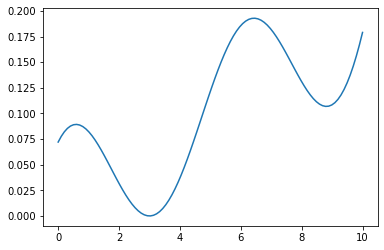

In [2]:
def func(x):
    #注意，超出范围的概率要设置为0
    w=np.ones_like(x)
    w=np.where(x<0,0,w)
    w=np.where(x>10,0,w)
    return w*((x-2)*(x-2)+(x-5)*(x-5)*(x-5)+100*np.cos(x)+106)/1179
x=np.linspace(0,10,100)
plt.plot(x,func(x))

我们的$q(x\rightarrow x')$可以任意选择（但是要包含到区间$(0,10)$），比如均值为$x$，方差为1的建议分布：   

$$
q(x,x')=\frac{1}{\sqrt{2\pi}}e^{-\frac{(x'-x)^2}{2}}
$$  

接下来采样看看效果

In [3]:
#采样的样本量
nums=10000
count=0
points=[]
#采样x0
point=np.random.randn()
points.append(point)
while count<nums:
    #按照q(x,x')，采下一个点：均值为0，方差为1的标准正态分布采样+point偏置
    new_point=np.random.randn()+point
    #alpha(x,x')
    alpha=min(1.,func(new_point)/(1e-12+func(point)))
    #从(0,1)均匀采样一个u
    u=np.random.random()
    #判断是否接收新点还是旧点
    if u<alpha:
        points.append(new_point)
        point=new_point
    else:
        points.append(point)
    count+=1

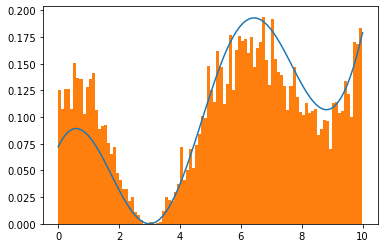

In [4]:
#看看效果
plt.plot(x,func(x))
plt.hist(points,density=True,bins=100,stacked=True)
plt.show()

### 六.小结
这一节的主要内容是将细致平衡方程成功落地到MH算法中，但是对于实际问题中建议分布$q(x\rightarrow x')$的采样往往比较麻烦，因为实际数据中，随机变量$x$往往都是高维数据，比如对于文本数据，用单词做随机变量的话，能高达上万维，在那么高维的空间造一个容易采样的建议分布极其困难，那我们借鉴一下优化中常使用的坐标轮换法（比如SVM中所使用的SMO）思路，采样有没有可能只需在单个维度上进行呢？然后遍历随机变量的所有维度完成一次采样，可以的，那就是下一节将要介绍的单分量MH算法....